<a href="https://colab.research.google.com/github/Eric881028/-/blob/%E5%B7%A8%E9%87%8F%E8%B3%87%E6%96%99%E4%BD%9C%E6%A5%AD/AGE%2C_GENDER_AND_ETHNICITY_(FACE_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instructions
#ETHNICITIES = {
#    0: "White",
#    1: "Black",
#    2: "Asian",
#    3: "Indian",
#    4: "Hispanic"
#}
#GENDERS = {
#    0: "Male",
#    1: "Female"
#}

import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from torchvision.models import mobilenet_v2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#define path and perform transformation
raw_df = pd.read_csv("/content/drive/MyDrive/巨量資料/age_gender.csv")

In [ ]:
raw_df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


像素是圖像陣列。假設你是大小為 48 48 的灰度圖像。我們不需要圖像名稱列，所以讓我們將其刪除並在像素列上執行一些操作以獲得 48 48 數組形式的圖像

In [ ]:
#刪除raw_df數據框中的'img_name'列
raw_df.drop('img_name',axis=1,inplace=True)

In [ ]:
#將'pixels'列的數據存儲在名為pix的變量中，輸出pix變量中索引為0的元素，即數據中的第一個像素值
pix=raw_df['pixels']
pix[0]

'129 128 128 126 127 130 133 135 139 142 145 149 147 145 146 147 148 149 149 150 153 153 153 152 153 153 153 153 153 151 149 147 146 146 144 143 140 134 129 129 126 122 121 119 118 118 99 53 130 129 128 126 127 130 135 141 143 143 144 145 143 142 144 145 146 149 149 148 151 151 151 151 152 153 153 153 153 149 148 147 146 146 142 141 138 133 130 130 128 123 124 122 120 117 98 52 131 129 130 129 129 134 138 144 145 143 143 139 140 138 139 140 142 145 147 149 151 149 149 149 151 152 151 150 150 148 147 145 144 142 140 137 136 135 134 131 128 126 126 123 122 114 97 50 135 134 133 132 131 136 142 145 147 144 141 143 138 131 133 134 137 139 143 147 148 149 149 149 151 151 149 147 147 146 141 139 135 137 137 137 137 138 137 134 132 129 130 124 124 115 95 52 138 139 139 135 134 138 140 140 140 140 140 140 139 134 131 127 131 131 133 138 143 148 149 149 150 151 148 144 141 138 139 133 133 137 139 139 141 140 140 136 132 131 132 125 125 115 91 50 141 145 144 138 135 139 139 133 127 123 124 122 1


我們需要拆分這些像素並將它們轉換為數組，並提供給我們圖像的形狀為 48*48。讓我們應用這個操作然後檢查

In [ ]:
# 將'pixels'列中的每個元素按空格分割，並將結果轉換為浮點數型的numpy數組。這一步將像素值由字符串形式轉換為數字形式
raw_df['pixels']=raw_df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))
raw_df.head()

,age,ethnicity,gender,pixels
0,1,2,0,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."



我們有圖像數組，但我們需要在 0 到 255 的範圍內縮放它們

In [ ]:
#將'pixels'列中的每個數組元素除以255，進行歸一化處理。這一步將像素值縮放到0到1之間的範圍
raw_df['pixels'] = raw_df['pixels'].apply(lambda x: x/255)

In [ ]:
#檢查raw_df數據框中的第三行的像素值數組的長度是否為48x48。這個條件判斷可以用來驗證數據是否符合預期的形狀
48*48==len(raw_df.pixels[2])

True

所以我們已經將數據轉換為正確的格式。現在讓我們檢查一下這個數據中有多少不同的年齡、性別和種族

In [ ]:
#輸出數量
print("Unique Gender", raw_df.gender.nunique())
print("Unique Ethnicities", raw_df.ethnicity.nunique())
print("Unique Ages", raw_df.age.nunique())

Unique Gender 2
Unique Ethnicities 5
Unique Ages 104



讓我們訓練一個用於性別和種族分類的分類模型和一個用於年齡預測的回歸模型。

**定義基本效用函數**


讓我們定義我們將一次又一次用於不同目的的基本功能

**在 GPU 上設置數據**

GPU 是圖形處理單元，可以非常有效地訓練深度神經網絡。 Kaggle 和 Google Colab 等一些在線平台免費為我們提供 GPU。所有數據都需要在 GPU 上移動，您需要在 GPU 的幫助下對其進行訓練。

In [ ]:
# Pick GPU if available else CPU. Availability of GPU can be checked using torch.cuda.is_available()
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

# Move Tensors to GPU
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
# Now Let's wrap a dataloaders to move data to a device
class DeviceDataLoader():

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
    #Yielding a batch of data after moving it to device
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
    # return Number of batches
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

**General Model Training Functions**

定義對像以擴展 nn.Module 類，並在該對象內定義用於訓練和驗證我們的模型的函數。我們這樣做是因為我們將使用相同的程序來訓練和評估我們的模型

In [ ]:
#定義了一些與模型訓練和評估相關的功能和類別
# Defining a function to return what's the accuracy of our model
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # Label for maximum of probabilities for each row
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)) #fraction predictions that match Target labels

# Extending nn.Module
class Base(nn.Module):
    # training
    def training_step(self, batch,age=False):

        if not age:
            images, labels = batch
            out = self(images) # Generate predictions
            loss = F.cross_entropy(out, labels) # Calculate loss
        else:
            images, targets = batch
            targets = targets.to(torch.float32)
            out = self(images)
            loss =torch.sqrt(F.mse_loss(out[:,0],targets))
        return loss
    # For validation set
    def validation_step(self, batch,age=False):

        if not age:
            images, labels = batch
            out = self( images)  # Generate predictions
            loss = F.cross_entropy(out, labels) # Calculate loss
            acc = accuracy(out, labels)           # Calculate accuracy
            return {'val_loss': loss.detach(), 'val_acc': acc}
        else:
            images, targets = batch
            out = self(images)
            loss =torch.sqrt(F.mse_loss(out[:,0],targets)) # Calculate loss


        return {'val_loss': loss.detach()}
    # Stacking batch losses & accuracies and getting average
    def validation_epoch_end(self, outputs,age=False):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        if not age:
            batch_accs = [x['val_acc'] for x in outputs]
            epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
            return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result,age=False):
        if not age:
            print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
        else:
            print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}".format(
                epoch, result['lrs'][-1], result['train_loss'], result['val_loss']))

最初定義函數以在驗證集上評估模型。如果我們要評估測試集，此功能將很有幫助

In [ ]:
#定義了一個evaluate函數，用於評估模型在驗證集上的性能
@torch.no_grad() #是一個裝飾器，用於在函數中關閉梯度追蹤。這是因為在評估模型時，我們不需要計算梯度，只需要使用模型的預測結果進行計算
def evaluate(model, val_loader,age=False):
    model.eval()
    outputs = [model.validation_step(batch,age=age) for batch in val_loader]
    return model.validation_epoch_end(outputs,age=age)

現在讓我們定義函數來最終訓練我們的模型，該函數將調用訓練步驟函數。此函數將獲得訓練損失並應用梯度下降和其他優化，如權重衰減、梯度裁剪和 lr 調度程序。最後，函數應該根據它在那個時代之前學到的知識來評估模型

In [ ]:
#定義了一個fit_one_cycle函數，用於執行模型的訓練和驗證過程
#使用了一個"one-cycle learning rate"策略，該策略在訓練過程中逐漸增加學習率，然後再逐漸降低。這有助於加速訓練過程並提高模型性能。
# Function to get the lr for each epoch so that we can take a look over it as well
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# 此函數接受以下參數  epochs: 訓練的總共的輪次數。max_lr: 學習率的上限，使用一個區間進行變化。model: 要訓練的模型。train_loader: 訓練資料的資料加載器。
#val_loader: 驗證資料的資料加載器。weight_decay（可選）：權重衰減（L2正則化）的係數，預設為0。grad_clip（可選）：梯度裁剪的閾值，用於防止梯度爆炸，預設為None。
#opt_func（可選）：優化器的類型，預設為torch.optim.SGD。age（可選）：一個布林值，指示是否進行年齡預測
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD,age=False): # using Schocatic Gradient Descent optimizer
    torch.cuda.empty_cache() # deleting cache
    history = []

    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch,age=age)
            train_losses.append(loss)

            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad() # no previous gradient get further used.

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader,age=age)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result,age=age) # This will print all losses and accuracy obtained after each epoch
        history.append(result) # Saving this result into a list
    return history # returning results after all epochs

**Defining convolution Blocks¶**
定義卷積塊

In [ ]:
#定義卷積塊的函數
#Let's defining function for doing optimization after each convolution layer
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), #Convolution layer
              nn.BatchNorm2d(out_channels), # Batch normalization, to help model generalize and learn better
              nn.ReLU(inplace=True)] # Activation function introduction of non linearity
    if pool:
        layers.append(nn.MaxPool2d(2)) # Maxpooling if required
    return nn.Sequential(*layers)

**Functions for Creating Datasets, Data Loaders & Data Augmentation (transforms).**
用於創建數據集、數據加載器和數據擴充（轉換）的函數

In [ ]:
#用於創建數據集（TensorDataset）的函數
def create_ds(ge_df,age=False):
    if not age:
        ge=np.array(ge_df['EncodedGE'].tolist())
    else:
        ge=np.array(ge_df['age'].tolist())
    X = np.array(ge_df['pixels'].tolist())
    Y = X.reshape(X.shape[0],1,48,48)
    images=torch.from_numpy(Y)
    labels=torch.from_numpy(ge)
    ds=TensorDataset(images,labels)
    return ds

In [ ]:
#創建數據加載器（DataLoader）的函數
def create_dl(ds,batch_size=100,val=False):
    if val: dl = DataLoader(ds, batch_size*2, shuffle=False, num_workers=2, pin_memory=True)
    else: dl = DataLoader(ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
    return dl

In [ ]:
#用於計算數據集的平均值和標準差的函數。它接受一個數據加載器（DataLoader）對象作為參數
# functions for getting mean and stanrd deviation across all channels in order to use them for normalizing data
def get_mean_std(dl):
    ch_sum, ch_sq_sum, num_batches = 0, 0, 0
    for data,_ in dl:
        ch_sum += torch.mean(data, dim=[0,2,3])
        ch_sq_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    mean = ch_sum/num_batches
    std = (ch_sq_sum/num_batches - mean**2)**0.5
    return mean, std

In [ ]:
#用於計算數據集的統計信息，包括平均值和標準差
def get_stats(ds,b_size=100,val=False):
    if val: dl = DataLoader(ds, b_size*2, shuffle=False, num_workers=2, pin_memory=True)
    else: dl = DataLoader(ds, b_size, shuffle=True, num_workers=2, pin_memory=True)
    stats=(4.5)
    stats =get_mean_std(dl)
    return stats

In [ ]:
# Applying Data augmentations 用於應用數據增強操作
def apply_transforms(train_ds,val_ds,train=True):
    val_stats=get_stats(val_ds,val=True)
    val_tfms = tt.Compose([ tt.Normalize(*val_stats)])
    val_ds.transform=val_tfms
    if train:
        train_stats =get_stats(train_ds)
        train_tfms = tt.Compose([tt.RandomCrop(48, padding=4, padding_mode='reflect'),
                                 tt.RandomHorizontalFlip(),
                                 tt.RandomRotation(13),
                                 tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                                 tt.Normalize(*train_stats,inplace=True)])
        train_ds.transform=train_tfms
        return train_ds,val_ds
    return val_ds

**Functions for showing and prdicting images.**

In [ ]:
#函數用於對圖像進行反歸一化操作
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 1, 1, 1)
    stds = torch.tensor(stds).reshape(1, 1, 1, 1)
    return images * stds + means
#函數用於顯示數據加載器中的一個批次的圖像
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        #denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1)) # in order to give img in format matplotlib requires
        break

In [ ]:
# function to predict single images  after model has been trained 用於在模型訓練完成後對單個圖像進行預測
def predict_image(img, model,age=False):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    if not age:
       # Pick index with highest probability
        _, preds  = torch.max(yb, dim=1)
        # Retrieve the class label
        return [preds[0].item()]
    else:
        return(yb)

**Functions for predicting accuracy for subclasses**

In [ ]:
#用於獲取子類別（性別或種族）的預測結果
def get_subclass_preds(sclass,val_df,model):
    dfs,allpreds=[],[]
    uniques=val_df[sclass].unique()
    uniques.sort()
    for _ in uniques :
        sub_df=val_df[val_df[sclass]==_]
        dfs.append(sub_df)
    for _ in range(len(dfs)):
        ds=create_ds(dfs[_])
        ds=apply_transforms(0,ds,train=False)
        preds=[]
        for _ in range(len(ds)):
            img, label = ds[_]
            pred= predict_image(img, model)
            preds+=pred
        allpreds.append(preds)

    for _ in range(len(allpreds)):
            if sclass=='gender':
                if _==0: print(f"Accuracy for {sclass} {_} :", sum(i < 5 for i in allpreds[_])/len(allpreds[_]))
                else: print(f"Accuracy for {sclass} {_} :", sum(i > 4 for i in allpreds[_])/len(allpreds[_]))
            elif sclass=='ethnicity':
                if _>4: return
                print(f"Accuracy for {sclass} {_} :", sum(i ==_ or i==_+5 for i in allpreds[_])/len(allpreds[_]))
    return allpreds  # just in case we want to plot and compare

In [ ]:
#用於獲取不同年齡組的預測結果和均方根誤差（RMSE）
def get_subclass_age_rmse(val_df,model,Range):
    dfs,allpreds=[],[]
    val_df['agegroup']=val_df['age']//Range
    uniques=val_df['agegroup'].unique()
    uniques.sort()
    for _ in uniques :
        sub_df=val_df[val_df['agegroup']==_]
        dfs.append(sub_df)
    for _ in range(len(dfs)):
        ds=create_ds(dfs[_],age=True)
        ds=apply_transforms(0,ds,train=False)
        preds=[]
        for i in range(len(ds)):
            img, label = ds[i]
            pred= predict_image(img, model,age=True)
            pred=pred.detach()
            preds+=pred
       # allpreds.append(preds)
        dl=create_dl(ds,val=True)
        dl = DeviceDataLoader(dl, device)
        l_limit,u_limit=(_)*Range,(_+1)*Range
        print(f"RMSE for age group {l_limit} to {u_limit} :", evaluate(model, dl,age=True))
        print(f"Accuracy for age group {l_limit} to {u_limit} :",round((sum(x < u_limit and x >=l_limit for x in preds)/len(preds)).item(),2))

**Model for Gender and Ethnicity¶**

In [ ]:
# Let's check for many images do we have for each set of gender-ethnicity 檢查每個性別和種族組合中有多少圖像
ge_df=raw_df.groupby(['gender','ethnicity']).count()
ge_df

age  pixels
gender ethnicity              
0      0          5477    5477
       1          2318    2318
       2          1575    1575
       3          2261    2261
       4           760     760
1      0          4601    4601
       1          2208    2208
       2          1859    1859
       3          1714    1714
       4           932     932

現在我們可以通過連接性別和種族值來獲得唯一值，我們應該執行此操作並創建一個新列。然後我們可以對該列進行標籤編碼以獲得我們將提供給模型的最終目標

In [ ]:
#將性別（gender）和種族（ethnicity）結合成一個新的列（GenderEthnicity），並使用LabelEncoder將其編碼為數值
raw_df['GenderEthnicity'] = raw_df.gender.astype(str) + raw_df.ethnicity.astype(str)
encoder=LabelEncoder()
raw_df['EncodedGE']=encoder.fit_transform(raw_df['GenderEthnicity'])

In [ ]:
px.histogram(raw_df,'EncodedGE',title='Count of images for each target')

目標 4 和 9 的圖像數量非常少，即 760 和 932。我們還有大量目標 0 和 5 的圖像。這是偏態分佈。所以我們至少可以做的是在訓練集中的大多數目標的圖像樣本下隨機

In [ ]:
# 將原始資料的約15%隨機選取作為驗證集（validation set），並將其存儲在val_df中。請注意，
#我們使用了random_state=40以確保在不同的執行中得到相同的驗證集
x=len(raw_df)
val_df=raw_df.sample(x//7,random_state=40)

In [ ]:
# 將原始資料的其餘部分（85%左右）複製到train_df中，並從中刪除驗證集（val_df）的索引，以確保訓練集和驗證集不重疊
train_df=raw_df.copy()
train_df.drop(val_df.index,inplace=True)

現在，您擁有了兩個資料框：train_df（訓練集）和val_df（驗證集），可以使用它們來進行模型的訓練和評估

In [ ]:
#執行了一個欠取樣操作，以確保各個類別的樣本數量相對平衡
#編碼的樣本數量大於2000，則隨機選取2300個樣本；如果樣本數量在2000和2500之間，則隨機選取2000個樣本；如果樣本數量小於等於2000，則全部保留
train_df.reset_index(drop=True)
train_df=train_df[['EncodedGE','pixels']]
ge_df = pd.DataFrame(columns=['EncodedGE','pixels'])
for _ in train_df.EncodedGE.unique():
    if len(train_df[train_df.EncodedGE==_])>2000:
        if len(train_df[train_df.EncodedGE==_])>2500:
            x=train_df[train_df.EncodedGE==_].sample(2300).copy()
        else: x=train_df[train_df.EncodedGE==_].sample(2000).copy()
        ge_df=pd.concat([ge_df, x], axis=0)
        del x
    else:
        x=train_df[train_df.EncodedGE==_].copy()
        ge_df=pd.concat([ge_df, x], axis=0)
        del x

In [ ]:
#經過欠取樣操作後所得到的訓練集，其中包含了平衡了樣本數量的各個類別的樣本
ge_df

,EncodedGE,pixels
0,2,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ..."
1,2,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,..."
2,2,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,..."
3,2,"[0.75686276, 0.77254903, 0.7764706, 0.78431374..."
4,2,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ..."
...,...,...
23644,6,"[0.13725491, 0.18431373, 0.26666668, 0.2901961..."
23649,6,"[0.7176471, 0.43137255, 0.4509804, 0.40392157,..."
23685,6,"[0.7607843, 0.63529414, 0.5647059, 0.57254905,..."
23688,6,"[0.6901961, 0.6901961, 0.6901961, 0.67058825, ..."


In [ ]:
#使用 create_ds 函數將 ge_df 和 val_df 轉換為對應的訓練集 (train_ds) 和驗證集 (val_ds)。這些資料集包含圖像數據和相應的目標變數，可以用於模型的訓練和評估
train_ds=create_ds(ge_df)
val_ds=create_ds(val_df)

images.shape: torch.Size([1, 48, 48])
tensor(2)


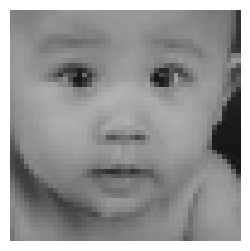

In [ ]:
# 從訓練資料集 (train_ds) 中獲取一個圖像及其標籤，並將圖像顯示出來
for images, labels in train_ds:
    print('images.shape:', images.shape)
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=2).permute((1, 2, 0)))
    print(labels)
    break

In [ ]:
#對訓練資料集和驗證資料集應用了轉換 (apply_transforms)。接著，我們創建了訓練資料載入器 (train_dl) 和驗證資料載入器 (valid_dl)
train_ds,val_ds=apply_transforms(train_ds,val_ds) # Applying transforms to datasets

# creating train and validation loaders
train_dl = create_dl(train_ds)
valid_dl = create_dl(val_ds,val=True)

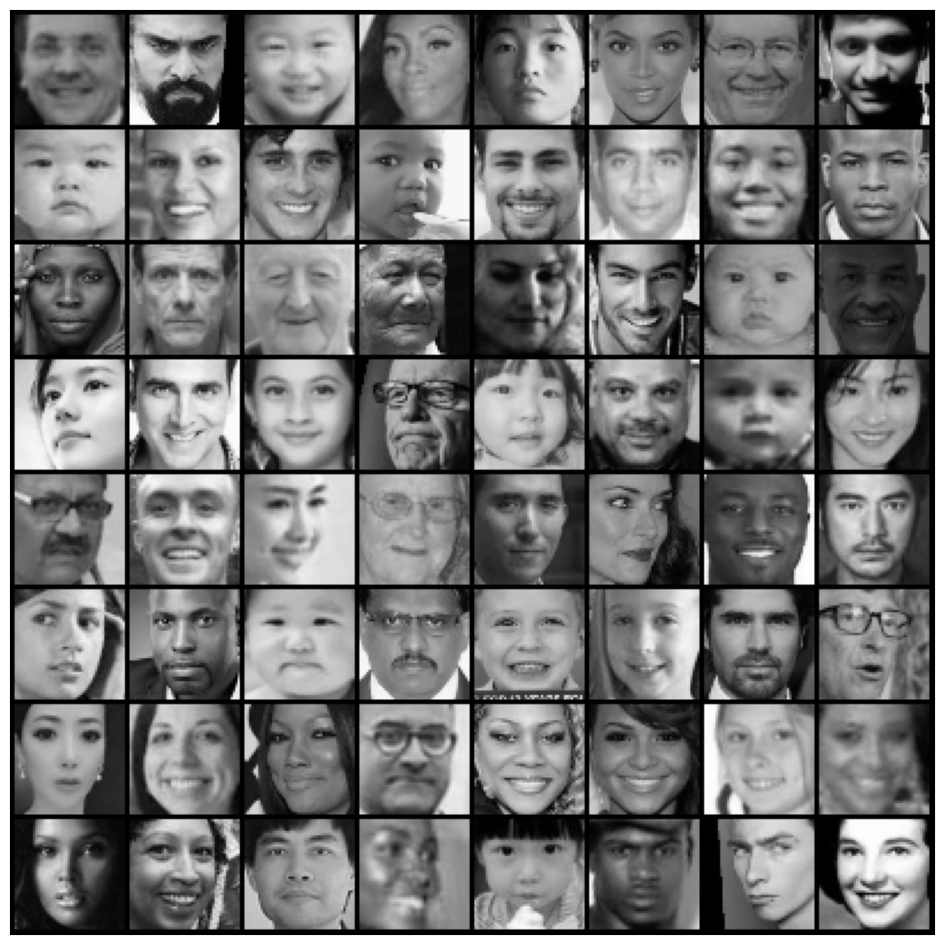

In [ ]:
#訓練資料載入器的第一批資料的圖像展示
show_batch(train_dl)

In [ ]:
# 將資料載入器轉移到 GPU 上
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

**Defining RESNET-9 Model**

In [ ]:
# 擴展了 Base 類別並定義了 ResNet9 架構。這個模型具有幾個卷積層、殘差塊和分類器層，用於進行圖像分類任務
class ResNet9(Base):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = conv_block(in_channels, 200)
        self.conv2 = conv_block(200, 100, pool=True)
        self.res1 = nn.Sequential(conv_block(100,100), conv_block(100,100))

        self.conv3 = conv_block(100, 190, pool=True)
        self.conv4 = conv_block(190, 360, pool=True)
        self.res2 = nn.Sequential(conv_block(360, 360), conv_block(360, 360))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Dropout(0.2),
                                        nn.Linear(360, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
# S將模型移至 GPU 上，並使用 ResNet9 類別建立了一個具有 1 個輸入通道和 10 個類別的模型物件。
model = to_device(ResNet9(1, 10), device)
model # 透過列印模型，您可以檢查是否一切正常，確保模型的架構和設置都符合您的期望

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(1, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(200, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace

現在我們已經製作了 Resnet9 模型並將其轉移到 GPU 上。讓我們在不對驗證集進行任何訓練的情況下評估模型。

In [ ]:
#history是一個列表，用於存儲模型在驗證數據集上的評估結果
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.3009190559387207, 'val_acc': 0.19366540014743805}]

我們的準確率只有 9%。現在讓我們訓練我們的模型提供適當的超參數

In [ ]:
#使用 fit_one_cycle 函數來訓練模型
#用於計算程式執行所需的時間
%%time
epochs = 10
max_lr = 0.004
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.NAdam
history=[]
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00111, train_loss: 1.7686, val_loss: 1.2970, val_acc: 0.5583
Epoch [1], last_lr: 0.00304, train_loss: 1.3366, val_loss: 1.5001, val_acc: 0.5094
Epoch [2], last_lr: 0.00400, train_loss: 1.1611, val_loss: 1.5125, val_acc: 0.5024
Epoch [3], last_lr: 0.00380, train_loss: 0.9403, val_loss: 1.0973, val_acc: 0.6235
Epoch [4], last_lr: 0.00325, train_loss: 0.7902, val_loss: 0.9548, val_acc: 0.6712
Epoch [5], last_lr: 0.00245, train_loss: 0.6426, val_loss: 0.8840, val_acc: 0.6943
Epoch [6], last_lr: 0.00155, train_loss: 0.4730, val_loss: 0.9506, val_acc: 0.7070
Epoch [7], last_lr: 0.00075, train_loss: 0.2817, val_loss: 0.8888, val_acc: 0.7360
Epoch [8], last_lr: 0.00020, train_loss: 0.1362, val_loss: 0.9572, val_acc: 0.7543
Epoch [9], last_lr: 0.00000, train_loss: 0.0705, val_loss: 0.9991, val_acc: 0.7532
CPU times: user 1min 51s, sys: 1min 37s, total: 3min 29s
Wall time: 3min 34s


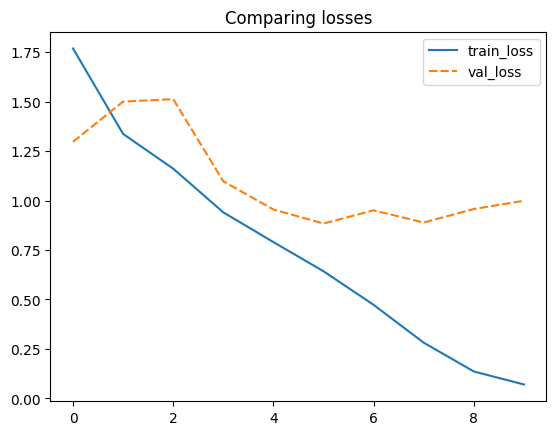

In [ ]:
#顯示了訓練過程中的損失趨勢。損失是衡量模型預測與實際目標之間差異的指標，它越小表示模型的預測結果越接近實際目標
history_df=pd.DataFrame(history)
sns.lineplot(data=history_df[['train_loss','val_loss']]).set(title='Comparing losses');
#都呈現下降趨勢，表示模型正在學習並逐漸適應訓練數據。然而，如果 train_loss 下降而 val_loss 開始上升，可能表示模型出現了過度擬合

現在讓我們定義一個函數來了解我們的模型對於不同類型的種族和性別的準確性。我們將定義一個函數，它將性別或種族作為輸入，然後為所有不同的子類型分離 val_df。然後用我們的模型對每個類別進行預測，並為每個類別類型打印準確性

In [ ]:
#計算性別（gender）子類別的預測結果
preds_g=get_subclass_preds('gender',val_df,model=model)

Accuracy for gender 0 : 0.922722029988466
Accuracy for gender 1 : 0.9079903147699758


In [ ]:
#算種族（ethnicity）子類別的預測結果
preds_e=get_subclass_preds('ethnicity',val_df,model=model)

Accuracy for ethnicity 0 : 0.835820895522388
Accuracy for ethnicity 1 : 0.8853695324283559
Accuracy for ethnicity 2 : 0.8665377176015474
Accuracy for ethnicity 3 : 0.8253968253968254
Accuracy for ethnicity 4 : 0.44396551724137934


In [ ]:
#history是一個列表，用於存儲模型在驗證數據集上的評估結果
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 0.9991418123245239, 'val_acc': 0.7532099485397339}]

我們的模型在預測性別方面做得很好，但我們對第 4 類種族的準確性非常低。這可能是因為我們對第 4 類種族的數據非常少，或者我們需要對模型進行一些更改以使其學習得更好。但是到目前為止，我們的模型可以很好地預測所有其他種族，所以這不應該用於預測種族 4。如果我們一起刪除種族 4，模型的準確性可能會大大提高。

因此，截至目前，我們的模型可以很好地預測性別，準確率超過 90%，除種族 4 外，所有種族的準確率都超過 80%。
現在讓我們看看我們的模型對驗證數據集中隨機圖像的一些預測

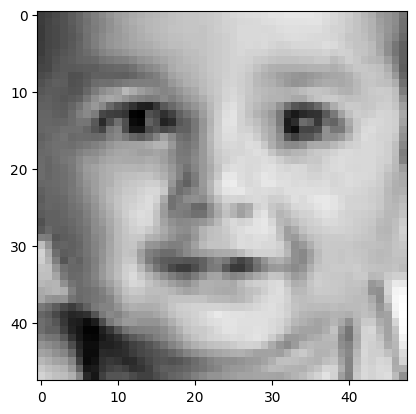

Label: tensor(3) , Predicted: [3]


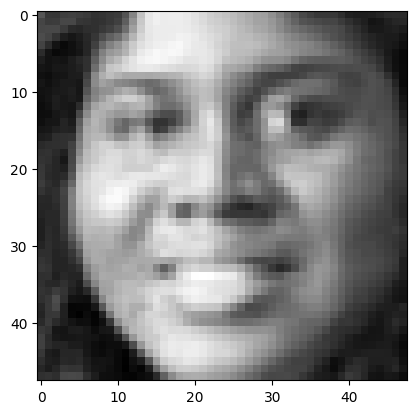

Label: tensor(6) , Predicted: [6]


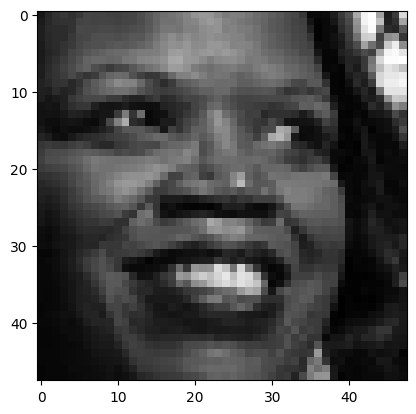

Label: tensor(6) , Predicted: [6]


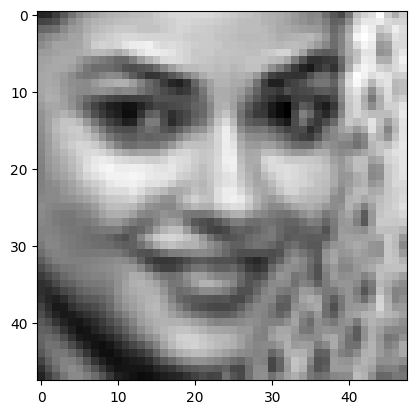

Label: tensor(9) , Predicted: [8]


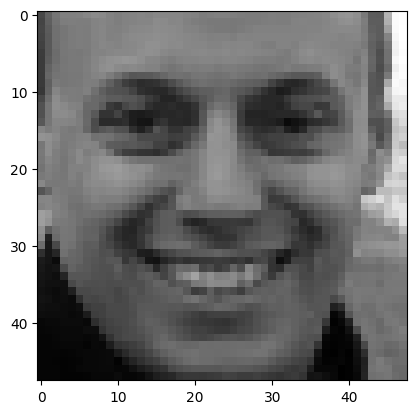

Label: tensor(0) , Predicted: [0]


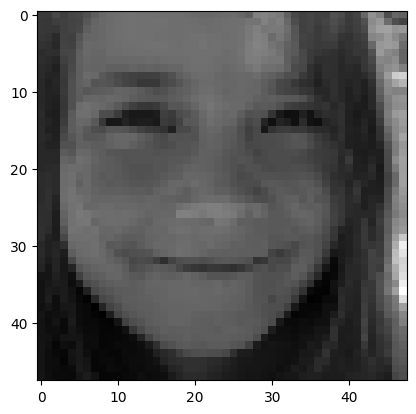

Label: tensor(5) , Predicted: [5]


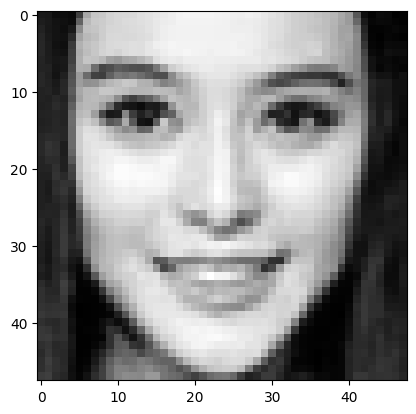

Label: tensor(7) , Predicted: [7]


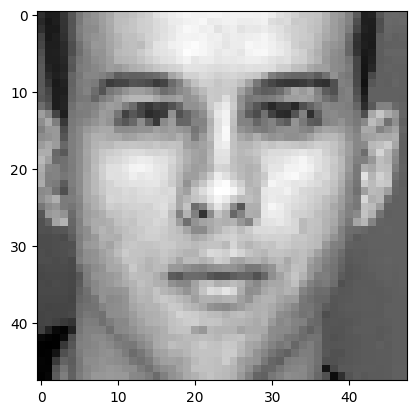

Label: tensor(0) , Predicted: [0]


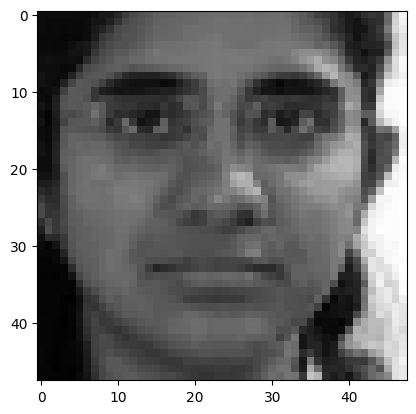

Label: tensor(8) , Predicted: [3]


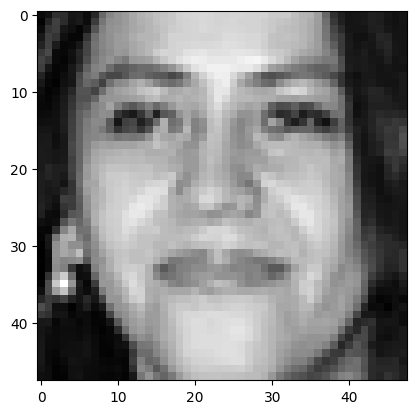

Label: tensor(8) , Predicted: [9]


In [ ]:
#從驗證資料集 val_ds 中隨機選擇 10 張圖片，並顯示圖片及其對應的標籤和模型的預測結果
import random

for i in range(10):
    num1=random.randint(0,300)
    img, label = val_ds[num1]
    #ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
    plt.imshow(img.permute(1, 2, 0).clamp(0,1),cmap='gray')
    plt.show()
    print('Label:', val_ds[num1][1], ', Predicted:', predict_image(img, model))

**Model for Age¶**

In [ ]:
# Checking Value counts for all ages
Age_df=raw_df[['age']].value_counts()
Age_df=Age_df.reset_index()
Age_df.rename(columns = {0:'Value_counts'}, inplace = True)
Age_df

,age,Value_counts
0,26,2197
1,1,1123
2,28,918
3,35,880
4,24,859
...,...,...
99,115,3
100,91,2
101,101,2
102,103,1


In [ ]:
# 檢查不同範圍的年齡值在資料集中的數量
for _ in range(100,1100,100):
    print(f"From {_-100} to {_}  :",Age_df[(Age_df.Value_counts<_) & (Age_df.Value_counts>_-100)].shape[0])

From 0 to 100  : 40
From 100 to 200  : 24
From 200 to 300  : 16
From 300 to 400  : 6
From 400 to 500  : 5
From 500 to 600  : 2
From 600 to 700  : 2
From 700 to 800  : 2
From 800 to 900  : 2
From 900 to 1000  : 1


In [ ]:
#不同範圍的年齡值在資料集中的數量
for _ in range(10,104,10):
    print(f"From {_-10} to {_} :",Age_df[(Age_df.Value_counts<_) & (Age_df.Value_counts>_-10)].shape[0])

From 0 to 10 : 11
From 10 to 20 : 4
From 20 to 30 : 4
From 30 to 40 : 5
From 40 to 50 : 0
From 50 to 60 : 2
From 60 to 70 : 3
From 70 to 80 : 1
From 80 to 90 : 3
From 90 to 100 : 4


我們需要應用一些數據不平衡技術來稍微平衡我們的數據。或者我們應該放棄我們非常非常少的年齡

In [ ]:
#找到在資料集中出現次數少於 30 次的年齡值中的最小值
Age_df[Age_df.Value_counts<30].age.min()

77

所以我們有非常低的 80 歲以上的圖像。我們可以考慮刪除它們，但讓我們首先可視化年齡分佈。

In [ ]:
px.histogram(raw_df,'age',title='Count of Images vs Age for raw_df')

In [ ]:
# 從 raw_df 中刪除年齡大於80的數據，可以使用 query 方法過濾數據框
Age_df=raw_df[['age','pixels']]
Age_df=Age_df.query("age<81")

In [ ]:
#檢查是否存在遺失的年齡數據，為空，則表示沒有遺失的年齡數據
All_ages=[x for x in range(1,81)]
Missing_ages=np.setdiff1d(All_ages,Age_df.age)
Missing_ages

array([], dtype=int64)

In [ ]:
# 使用 sample 函數將 Age_df 數據框中的約 15% 數據分配給驗證集 val_df
x=len(Age_df)
val_df=Age_df.sample(x//7,random_state=40)

In [ ]:
# train_df.columns
train_df=Age_df.copy()
train_df.drop(val_df.index,inplace=True)

In [ ]:
train_df.columns

Index(['age', 'pixels'], dtype='object')

In [ ]:
#下採樣操作
#數量超過 400，則從該分組中隨機選取 400 個數據點；否則，將整個分組的數據點都加入到 train1_df 中
train_df.reset_index(drop=True)
train1_df = pd.DataFrame(columns=['age','pixels'])
for _ in train_df.age.unique():
    if len(train_df[train_df.age==_])>400:
        x=train_df[train_df.age==_].sample(400).copy()
        train1_df=pd.concat([train1_df, x], axis=0)
    else:
        x=train_df[train_df.age==_].copy()
        train1_df=pd.concat([train1_df, x], axis=0)
        del x

In [ ]:
#將訓練集 train_df 和下採樣後的訓練集 train1_df 中的年齡值減去了 1，將年齡值減去 1 可能是為了對年齡特徵進行偏移或重新編碼
train_df.age=train_df.age-1
train1_df.age=train1_df.age-1

In [ ]:
px.histogram(train_df,'age',title='Count of Images vs Age (below 90)')

In [ ]:
px.histogram(train1_df,'age',title='Count of Images vs Age (below 90) after undersampling')

數據仍然存在偏差（儘管小於原始數據），因此我們可以預期隨著年齡超過 40 歲會出現高損失。

In [ ]:
#將數據轉換為 PyTorch 的 Dataset 對象。現在您可以使用這些數據集來進行模型訓練和驗證
train_ds=create_ds(train_df,age=True)
val_ds=create_ds(val_df,age=True)
train1_ds=create_ds(train1_df,age=True)
val1_ds=create_ds(val_df,age=True)

images.shape: torch.Size([1, 48, 48])
tensor(0)


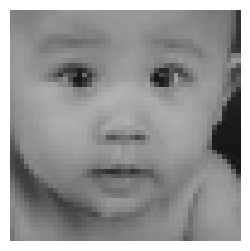

In [ ]:
#輸出圖像的形狀以及相應的標籤。請執行此程式碼以查看圖像和標籤的示例
for images, labels in train_ds:
    print('images.shape:', images.shape)
    plt.figure(figsize=(3,3))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=2).permute((1, 2, 0)))
    print(labels)
    break

In [ ]:
#將轉換應用於訓練和驗證數據集
train_ds,val_ds=apply_transforms(train_ds,val_ds,train=True) # applying trnsforms
train1_ds,val1_ds=apply_transforms(train1_ds,val1_ds,train=True) # applying trnsforms

In [ ]:
# 將創建數據加載器並將它們轉移到 GPU 上
train_dl=create_dl(train_ds,batch_size=100,val=False)
val_dl= create_dl(val_ds,batch_size=100,val=True)
train1_dl=create_dl(train1_ds,batch_size=100,val=False)
val1_dl= create_dl(val1_ds,batch_size=100,val=True)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
train1_dl = DeviceDataLoader(train1_dl, device)
val1_dl = DeviceDataLoader(val1_dl, device)

**Defining RESNET-18 model**

In [ ]:
#基於 ResNet18 架構的模型類別
class ResNet18(Base):
    def __init__(self, in_channels):
        super().__init__()
        self.conv0=conv_block(in_channels, 64)
        self.res0=nn.Sequential(conv_block(64,64), conv_block(64,64))
        self.res1 = nn.Sequential(conv_block(64,64), conv_block(64,64))
        self.conv1 = conv_block(64, 128)
        self.conv2 = conv_block(128, 256, pool=True)
        self.res2 = nn.Sequential(conv_block(256,256), conv_block(256,256))

        self.conv3 = conv_block(256, 450)
        self.conv4 = conv_block(450, 512,pool=True)
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        #self.dense_out = nn.Linear(in_features=hidden_size, out_features=1)

        self.conv5 = conv_block(512, 72)
        self.conv6 = conv_block(72, 250,pool=True)
        self.res4 = nn.Sequential(conv_block(250,250), conv_block(250,250))


        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Dropout(0.2),
                                        nn.Linear(250, 1))

    def forward(self, xb):
        out = self.conv0(xb)
        out = self.res0(out) + out
        out = self.res1(out) + out
        out = self.conv1(out)
        out = self.conv2(out)
        out = self.res2(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res3(out) + out
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res4(out) + out
        out = self.classifier(out)
        return out

In [ ]:
#將剛建立的 ResNet18 模型 ResNet18(1) 移到指定的設備上，並將其指定給 model2 變數
model2 = to_device(ResNet18(1), device)
model2

ResNet18(
  (conv0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res0): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, ke

In [ ]:
model21 = to_device(ResNet18(1), device)
model21

ResNet18(
  (conv0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res0): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, ke

**Training without undersampling**

In [ ]:
#將 model2 應用於 val_dl 數據加載器上，並獲取模型在驗證數據集上的評估結果
history = [evaluate(model2, val_dl,age=True)]
history

[{'val_loss': 37.01726531982422}]

In [ ]:
#執行模型的訓練
%%time
epochs = 10
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]
history += fit_one_cycle(epochs, max_lr, model2, train_dl, val_dl,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func,age=True)
# was for less than 70 age no under sampling

Epoch [0], last_lr: 0.00014, train_loss: 16.5910, val_loss: 10.6833
Epoch [1], last_lr: 0.00038, train_loss: 10.3853, val_loss: 14.3908
Epoch [2], last_lr: 0.00050, train_loss: 9.3369, val_loss: 11.8585
Epoch [3], last_lr: 0.00048, train_loss: 8.4314, val_loss: 10.2632
Epoch [4], last_lr: 0.00041, train_loss: 7.7334, val_loss: 8.8460
Epoch [5], last_lr: 0.00031, train_loss: 6.9304, val_loss: 7.6214
Epoch [6], last_lr: 0.00019, train_loss: 5.9894, val_loss: 7.5048
Epoch [7], last_lr: 0.00009, train_loss: 5.0544, val_loss: 7.5582
Epoch [8], last_lr: 0.00002, train_loss: 4.0656, val_loss: 7.3917
Epoch [9], last_lr: 0.00000, train_loss: 3.4931, val_loss: 7.3740
CPU times: user 6min 40s, sys: 6min 55s, total: 13min 35s
Wall time: 13min 49s


In [ ]:
#根據提供的歷史數據，包含訓練損失和驗證損失的字典列表，可以看出每個訓練輪的訓練損失和驗證損失的變化
#第一個字典表示第一個訓練輪的訓練損失為15.0964，驗證損失為11.8559。隨著訓練的進行，訓練損失和驗證損失逐漸下降，表明模型在訓練過程中逐漸學習到了特徵和模式
d=[{'train_loss': 15.0964, 'val_loss': 11.8559},
 {'train_loss': 10.1009, 'val_loss': 10.6219},
 {'train_loss': 8.6935, 'val_loss': 9.9400},
{'train_loss': 7.7548, 'val_loss': 7.6523},
 {'train_loss': 6.6470, 'val_loss': 7.7340},
 {'train_loss': 5.4600,'val_loss': 7.4865}]

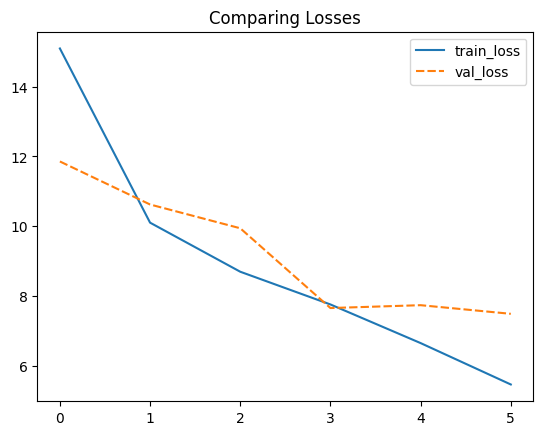

In [ ]:
history_df=pd.DataFrame(d)
sns.lineplot(data=history_df[['train_loss','val_loss']]).set(title='Comparing Losses');

**Training after undersampling majority classes**

In [ ]:
#確認是否正確執行了 to_device 函式
model21 = to_device(ResNet18(1), device)

In [ ]:
#執行訓練之前，需要先定義一個優化器（optimizer）並指定模型的參數和學習率。這樣才能使用 fit_one_cycle 函數進行模型訓練
history1 = [evaluate(model21, val1_dl,age=True)]
history1

[{'val_loss': 37.02024841308594}]

In [ ]:
%%time
epochs = 10
max_lr = 0.0004
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.NAdam
history1=[]
history1 += fit_one_cycle(epochs, max_lr, model21, train1_dl, val1_dl,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func,age=True)
# with under sampling

Epoch [0], last_lr: 0.00011, train_loss: 18.7931, val_loss: 13.6571
Epoch [1], last_lr: 0.00030, train_loss: 11.3633, val_loss: 11.4148
Epoch [2], last_lr: 0.00040, train_loss: 9.8299, val_loss: 14.4895
Epoch [3], last_lr: 0.00038, train_loss: 8.7334, val_loss: 10.2175
Epoch [4], last_lr: 0.00032, train_loss: 7.7534, val_loss: 15.0548
Epoch [5], last_lr: 0.00024, train_loss: 6.7636, val_loss: 7.9838
Epoch [6], last_lr: 0.00016, train_loss: 5.6177, val_loss: 8.2997
Epoch [7], last_lr: 0.00008, train_loss: 4.5973, val_loss: 7.5709


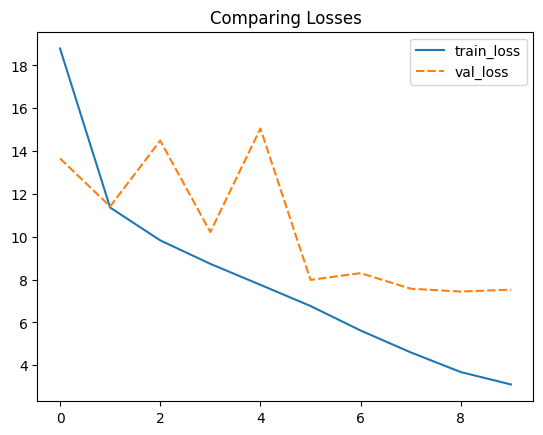

In [ ]:
history1_df=pd.DataFrame(history1)
sns.lineplot(data=history1_df[['train_loss','val_loss']]).set(title='Comparing Losses');

In [ ]:
#根據模型 model21 在驗證數據集上對年齡子類別進行預測並計算 RMSE 的結果
get_subclass_age_rmse(val_df,model21,20)

RMSE for age group 0 to 20 : {'val_loss': 5.157316207885742}
Accuracy for age group 0 to 20 : 0.81
RMSE for age group 20 to 40 : {'val_loss': 6.16684103012085}
Accuracy for age group 20 to 40 : 0.85
RMSE for age group 40 to 60 : {'val_loss': 8.824718475341797}
Accuracy for age group 40 to 60 : 0.63
RMSE for age group 60 to 80 : {'val_loss': 12.685808181762695}
Accuracy for age group 60 to 80 : 0.45
RMSE for age group 80 to 100 : {'val_loss': 15.44090747833252}
Accuracy for age group 80 to 100 : 0.05


In [ ]:
#根據模型 model2 在驗證數據集上對年齡子類別進行預測並計算 RMSE 的結果
get_subclass_age_rmse(val_df,model2,20)

RMSE for age group 0 to 20 : {'val_loss': 5.352574348449707}
Accuracy for age group 0 to 20 : 0.77
RMSE for age group 20 to 40 : {'val_loss': 5.673376083374023}
Accuracy for age group 20 to 40 : 0.89
RMSE for age group 40 to 60 : {'val_loss': 9.387072563171387}
Accuracy for age group 40 to 60 : 0.62
RMSE for age group 60 to 80 : {'val_loss': 12.42794132232666}
Accuracy for age group 60 to 80 : 0.56
RMSE for age group 80 to 100 : {'val_loss': 13.172324180603027}
Accuracy for age group 80 to 100 : 0.05


因此，似乎在欠採樣後訓練的模型（模型 2）比使用完整數據訓練的模型表現得更好（基於過度擬合曲線）。但是沒有欠採樣的模型對於較低年齡組具有更好的 RMSE，而在欠採樣後訓練的模型（model21）對於較高年齡組具有更好的 RMSE。
所以用model21預測老年人的圖像會更好，而用model2預測年輕人的圖像

In [ ]:
#從驗證數據集中隨機選取圖像並顯示該圖像，進行年齡預測並打印出真實年齡和預測年齡
import random

for i in range(10):
    num1=random.randint(0,700)
    img, label = val_ds[num1]
   # ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
    plt.imshow(img.permute(1, 2, 0).clamp(0,1))
    plt.show()
    pred=predict_image(img, model21,age=True)
    pred=pred.detach()
    print('Label:', val_ds[num1][1].item(), ', Predicted:',round(pred.item(),2))

In [ ]:
import torch
import h5py

# 將模型保存到文件
torch.save(model2.state_dict(), 'model2.h5')
torch.save(model.state_dict(), 'model.h5')

# 將模型文件轉換為H5格式
model_h5 = h5py.File('model2', 'w')
model_h5.close()
model_h5 = h5py.File('model', 'w')
model_h5.close()

In [ ]:
import pandas as pd

results = []

# 指定要存儲的100張圖片的索引
image_indices = range(100)

for i in image_indices:
    img, label = val_ds[i]
    pred = predict_image(img, model21, age=True)
    pred = pred.detach().item()

    result = {'Age_Predicted': round(pred, 2)}
    results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv('predictions.csv', index=False)


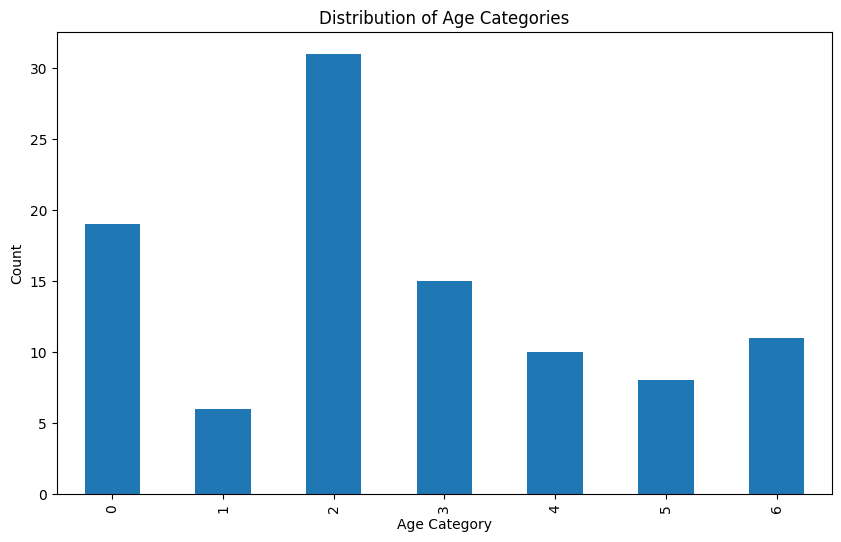

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results = []

# 指定要存儲的100張圖片的索引
image_indices = range(100)

for i in image_indices:
    img, label = val_ds[i]
    pred = predict_image(img, model21, age=True)
    pred = pred.detach().item()

    result = {'Age_Predicted': round(pred, 2)}
    results.append(result)

results_df = pd.DataFrame(results)
results_df['Age_Category'] = results_df['Age_Predicted'].apply(lambda x: int(x/10))  # 按照每10歲分為一個類別
age_counts = results_df['Age_Category'].value_counts().sort_index()  # 計算每個類別的頻次
age_counts.plot(kind='bar', figsize=(10, 6))  # 繪製長條圖
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

results_df.to_csv('predictions.csv', index=False)


In [ ]:
import csv

# 創建一個空的結果列表
results = []

# 指定要存儲的100張圖片的索引
image_indices = range(100)

# 遍歷圖片索引
for i in image_indices:
    img, label = val_ds[i]
    predicted_label = predict_image(img, model)

    results.append([predicted_label])

# 指定要保存的CSV檔案路徑
csv_file = 'predictions1.csv'

# 寫入CSV檔案
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([ 'Predicted'])  # 寫入CSV標頭
    writer.writerows(results)  # 寫入每個預測結果

print("CSV檔案保存成功。")


CSV檔案保存成功。


In [ ]:
import pandas as pd

# 讀取第一個CSV檔案
df1 = pd.read_csv('predictions.csv')

# 讀取第二個CSV檔案
df2 = pd.read_csv('predictions1.csv')

# 合併兩個DataFrame
merged_df = pd.concat([df1, df2], axis=1)

# 指定要保存的合併後的CSV檔案路徑
merged_csv_file = 'merged_predictions.csv'

# 寫入合併後的CSV檔案
merged_df.to_csv(merged_csv_file, index=False)

print("CSV檔案合併成功。")


CSV檔案合併成功。


CSV檔案保存成功。


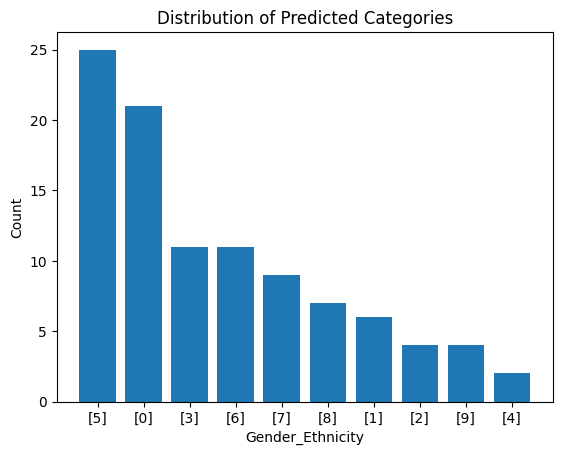

In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

# 創建一個空的結果列表
results = []

# 指定要存儲的100張圖片的索引
image_indices = range(100)

# 遍歷圖片索引
for i in image_indices:
    img, label = val_ds[i]
    predicted_label = predict_image(img, model)

    results.append([predicted_label])

# 指定要保存的CSV檔案路徑
csv_file = 'predictions1.csv'

# 寫入CSV檔案
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Predicted'])  # 寫入CSV標頭
    writer.writerows(results)  # 寫入每個預測結果

print("CSV檔案保存成功。")

# 讀取CSV檔案並計算類別頻率
df = pd.read_csv(csv_file)
category_counts = df['Predicted'].value_counts()

# 繪製長條圖
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Gender_Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Predicted Categories')
plt.show()


In [ ]:
merged_df

,Age_Predicted,Predicted
0,5.97,[5]
1,39.07,[3]
2,1.29,[7]
3,1.92,[3]
4,26.36,[5]
...,...,...
95,66.12,[0]
96,23.07,[9]
97,2.01,[7]
98,58.06,[5]



**Summary¶**

在 23k 個人圖像上成功訓練 CNN 模型以預測性別、種族和年齡。
性別預測的準確率超過 90%。
除種族 4 外，所有種族的平均準確率都超過 86%（可能是因為它的數據較少）。除種族 4 外，所有種族的準確率都在 80% 以上。
年齡預測的 RMSE 為 7。隨著年齡的增長，RMSE 逐漸增加。對於 40 歲以下的人，獲得的 RMSE 為 5.5。
數據抽樣不足有助於模型很好地概括少數群體。
使用數據增強技術、批量歸一化、學習率調度、權重衰減、梯度裁剪、Relu 激活和 Dropout 以獲得最佳結果。

**Future Work**

由於數據非常傾斜，可以應用對少數類進行過採樣或為少數類收集更多數據等技術
通過添加更多層、重新配置層以及使用超參數和數據增強技術來改進模型。
檢查混淆矩陣以更好地解釋我們的模型
可以使用來自現實世界的圖像來測試我們的模型

In [ ]:
#安裝套件用於抓取google drive圖片
!mkdir -p face_train
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url='https://drive.google.com/file/d/1_ZyGOJHz4CpMaj_Zc5PXvjcPJxBVo-f4/view?usp=sharing'
output='face_train/face.zip'

import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1_ZyGOJHz4CpMaj_Zc5PXvjcPJxBVo-f4
To: /content/face_train/face.zip
100%|██████████| 197k/197k [00:00<00:00, 36.1MB/s]


'face_train/face.zip'

In [ ]:
!unzip face_train/face.zip -d face_train

Archive:  face_train/face.zip
replace face_train/faceD/Female_Middle/FM (1).jfif? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import os
import pandas as pd
import torch
from torchvision import transforms
from PIL import Image

results = []

# 指定要預測的資料夾路徑
folder_path = "face_train/faceD"

# 預處理的轉換
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 遍歷資料夾及其子資料夾
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 獲取圖片路徑
        image_path = os.path.join(root, file)

        # 獲取類別
        class_name = os.path.basename(root)

        # 讀取圖片
        img = Image.open(image_path)

        # 預處理圖片
        img = preprocess(img)

        # 轉換圖片的維度
        img = img.unsqueeze(0)

        # 預測圖片
        pred = predict_image(img, model21, age=True)
        pred = pred.item()

        # 構建結果字典
        result = {'Image_Path': image_path, 'Class': class_name, 'Predicted': round(pred, 2)}
        results.append(result)


results_df = pd.DataFrame(results)
results_df.to_csv('predictions2.csv', index=False)


RuntimeError: ignored

In [ ]:
import pandas as pd

results = []

# 指定要預測的圖片路徑
image_paths = ["path_to_image1", "path_to_image2", "path_to_image3", ...]

for path in image_paths:
    # 讀取圖片
    img = read_image(path)

    # 預測圖片
    pred = predict_image(img, model21, age=True)
    pred = pred.detach().item()

    # 構建結果字典
    result = {'Image_Path': path, 'Predicted': round(pred, 2)}
    results.append(result)

results_df = pd.DataFrame(results)
results_df.to_csv('predictions.csv', index=False)


In [ ]:
import os
import random
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet18

# 加載預訓練模型
model = resnet18(pretrained=True)
model.eval()

# 處理圖片的函式
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 設定資料夾路徑
data_folder = 'face_train/Train'

# 取得資料夾中的所有圖片檔案路徑
image_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder)]

# 從檔案中隨機選取10張圖片進行推論
random.shuffle(image_files)
selected_images = image_files[:10]

for file in selected_images:
    image = Image.open(file)  # 讀取圖片檔案
    image = preprocess(image)
    image = torch.unsqueeze(image, 0)  # 將圖片轉為批次維度
    with torch.no_grad():
        predictions = model(image)
    # 在這裡處理預測結果
    print(predictions)


In [ ]:
import os
import random
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.models import resnet18

# 加載預訓練模型
model = resnet18(pretrained=True)
model.eval()

# 處理圖片的函式
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 設定資料夾路徑
data_folder = 'face_train/Train'

# 取得資料夾中的所有圖片檔案路徑
image_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder)]

# 從檔案中隨機選取10張圖片進行推論
random.shuffle(image_files)
selected_images = image_files[:10]

for file in selected_images:
    image = Image.open(file)  # 讀取圖片檔案
    image = preprocess(image)
    image = torch.unsqueeze(image, 0)  # 將圖片轉為批次維度
    with torch.no_grad():
        predictions = model(image)
    # 在這裡處理預測結果
    predicted_age = predictions.argmax(dim=1).item()
    print("Predicted Age:", predicted_age)
    plt.imshow(image.squeeze().permute(1, 2, 0))  # 將圖片轉換成 matplotlib 可用的格式
    plt.axis('off')  # 不顯示座標軸
    plt.show()


In [ ]:
import os
from PIL import Image

# 設定圖片資料夾路徑
folder_path = 'face_train/Train'

# 讀取圖片資料夾中的所有圖片
image_files = os.listdir(folder_path)

# 迭代處理每張圖片
for image_file in image_files:
    # 構建圖片路徑
    image_path = os.path.join(folder_path, image_file)

    # 讀取圖片並進行預處理
    image = Image.open(image_path)
    image = image.resize((224, 224))  # 調整圖片大小
    image = image.convert('RGB')  # 轉換為RGB模式
    image = np.array(image)  # 轉換為NumPy陣列
    image = image / 255.0  # 正規化圖片數值

    # 將圖片轉換為輸入張量
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()

    # 將輸入張量移動到指定設備上
    image_tensor = image_tensor.to(device)

    # 使用模型進行預測
    predicted_age = predict_image(image_tensor, model2, age=True)
    predicted_age = predicted_age.item()

    # 打印預測結果
    print('Image:', image_file, ', Predicted age:', round(predicted_age, 2))


In [ ]:
import random
import pandas as pd

# 建立空的結果列表
results = []

# 迭代處理每張圖片
for i in range(10):
    num1 = random.randint(0, 700)
    img, label = val_ds[num1]

    # 預測圖片
    pred = predict_image(img, model2, age=True)
    pred = pred.detach().item()

    # 將預測結果添加到結果列表中
    result = {'Image': num1, 'Label': label.item(), 'Predicted': round(pred, 2)}
    results.append(result)

# 將結果列表轉換為DataFrame
df = pd.DataFrame(results)

# 將DataFrame寫入CSV檔案
df.to_csv('predictions.csv', index=False)


In [ ]:
import random
import pandas as pd

# 建立一個空的結果列表
results = []

# 迭代每張圖片
for i in range(10):
    num1 = random.randint(0, 700)
    img, label = val_ds[num1]

    # 預測圖片
    img = img.unsqueeze(0).to(device)  # 添加批次維度並移到指定的設備上
    pred = model2(img, age=True)
    pred = pred.item()

    # 將預測結果加入結果列表
    result = {'圖片': num1, '真實標籤': label.item(), '預測標籤': round(pred, 2)}
    results.append(result)

# 將結果列表轉換為 DataFrame
df = pd.DataFrame(results)

# 將 DataFrame 寫入 CSV 檔案
df.to_csv('predictions.csv', index=False)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 設定圖片資料集的路徑
train_data_dir = 'face_train/Train'
validation_data_dir = 'face_train/validation'

# 設定模型參數
input_shape = (224, 224, 3)
batch_size = 32
num_classes = 1

# 使用 ImageDataGenerator 來讀取圖片資料
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# 建立模型
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='linear')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

# 訓練模型
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

In [ ]:
import random
import matplotlib.pyplot as plt

# 設定照片存放的資料夾路徑
data_folder = 'face_train/Train'
#class_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

# 建立一個2x2的子圖表格
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# 設定圖表標題
fig.suptitle('Randomly Selected Images', fontsize=16)

# 讀取照片並進行預處理
image_path = os.path.join(image_folder, data_folder)
image = Image.open(image_path)
image = image.resize((200, 200))
image = np.array(image)

# 使用ResNet50模型獲取特徵向量
features = resnet_model.predict(np.expand_dims(image, axis=0))

# 使用自建模型進行推論
predictions = model.predict(features)

# 根據模型訓練的類別索引，獲得預測結果的類別
predicted_class = np.argmax(predictions)

# 根據預測結果的類別索引，獲得類別標籤
predicted_label = class_labels[predicted_class]

# 顯示圖片及預測結果在子圖中
axes[row, col].imshow(image)
axes[row, col].axis('off')
axes[row, col].set_title(predicted_label)

# 調整子圖間的間距
plt.tight_layout()

# 顯示圖表
plt.show()

**mobilenet**

In [ ]:
class MobileNet(nn.Module):
    def __init__(self, num_classes):
        super(MobileNet, self).__init__()
        self.model = mobilenet_v2(pretrained=True)
        self.model.classifier[1] = nn.Linear(self.model.last_channel, num_classes)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, age=False):
        if not age:
            images, labels = batch
            out = self(images) # Generate predictions
            loss = F.cross_entropy(out, labels) # Calculate loss
        else:
            images, targets = batch
            targets = targets.to(torch.float32)
            out = self(images)
            loss = torch.sqrt(F.mse_loss(out[:, 0], targets)) # Calculate loss
        return loss

    def validation_step(self, batch, age=False):
        if not age:
            images, labels = batch
            out = self(images)  # Generate predictions
            loss = F.cross_entropy(out, labels) # Calculate loss
            acc = accuracy(out, labels)           # Calculate accuracy
            return {'val_loss': loss.detach(), 'val_acc': acc}
        else:
            images, targets = batch
            out = self(images)
            loss = torch.sqrt(F.mse_loss(out[:, 0], targets)) # Calculate loss
            return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs, age=False):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        if not age:
            batch_accs = [x['val_acc'] for x in outputs]
            epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
            return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result, age=False):
        if not age:
            print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
        else:
            print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}".format(
                epoch, result['lrs'][-1], result['train_loss'], result['val_loss']))

In [ ]:
#將剛建立的 MobileNet 模型移到指定的設備上，並將其指定給 mode2 變數
model3 = to_device(MobileNet(3), device)
model3

In [ ]:
#確認是否正確執行了 to_device 函式
model3 = to_device(MobileNet(3), device)

In [ ]:
#將 mode3 應用於 val_dl 數據加載器上，並獲取模型在驗證數據集上的評估結果
history3 = [evaluate(model3, val_dl,age=True)]
history3

In [ ]:
%%time
epochs = 10
max_lr = 0.0004
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.NAdam
history3=[]
history3 += fit_one_cycle(epochs, max_lr, model3, train1_dl, val1_dl,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func,age=True)
# with under sampling

In [ ]:
history3_df=pd.DataFrame(history3)
sns.lineplot(data=history3_df[['train_loss','val_loss']]).set(title='Comparing losses');

In [ ]:
#根據模型 model3 在驗證數據集上對年齡子類別進行預測並計算 RMSE 的結果
get_subclass_age_rmse(val_df,model3,20)

In [ ]:
#從驗證數據集中隨機選取圖像並顯示該圖像，進行年齡預測並打印出真實年齡和預測年齡
import random

for i in range(10):
    num1 = random.randint(0, 700)
    img, label = val_ds[num1]
    plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
    plt.show()
    pred = predict_image(img, model3, age=True)
    pred_age = pred.argmax().item()  # 取得預測年齡的索引，並轉換為標量值
    print('標籤:', val_ds[num1][1].item(), '，預測年齡:', pred_age)
